# EJERCICIOS

In [2]:
import numpy as np
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDRegressor,ElasticNet
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)

## EJERCICIO 1

Imagina que estás usando regresión polinomial. Trazas las curvas de aprendizaje y te das cuenta de que hay un espacio grande entre el error de entrenamiento y el error de validación. ¿Qué está pasando? Piensa en tres formas de poder arreglarlo

Estamos sobre ajustando y seguramente sea porque nuestro grado de polinomio es muy alto.
Para arreglarlo podriamos reducir el grado de polinomio, utilizar la regulización (Ridge o Lasso) u obtener mas datos de entrenamiento.


## EJERCICIO 2

Imagina que estás utilizando regresión de Ridge y observas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Deberías incrementar el hiperparámetro de regularización o reducirlo (α)?

Si el error de entrenamiento y el error de validacion son casi iguales seguramente este subajustando, es decir, no está capturando suficientemente bien los patrones en los datos, y tanto el entrenamiento como la validación están mostrando un rendimiento pobre.

Deberias de reducir alfa para permitir que el modelo se ajuste mejor a los datos y mejorar el rendimiento general del modelo

## EJERCICIO 3

Ejercicio de Regresión con el Conjunto de Datos de Diabetes

* Objetivo: El objetivo de este ejercicio es desarrollar un modelo de regresión que pueda predecir la progresión de la diabetes un año después del inicio basándose en diversas mediciones clínicas.

* Datos: Utilizarás el conjunto de datos de diabetes proporcionado por Scikit-Learn, que contiene diez variables base (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo) para 442 pacientes.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [3]:
dataset = load_diabetes(as_frame=True)
X, y = dataset.data, dataset.target

#### EXPLORAR LOS DATOS

Muestra los primero datos de X e y

In [4]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [7]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [8]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [9]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [10]:
df = X.copy()
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Usa .describe y .info para ver un poco de información

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Representa cada una de la características

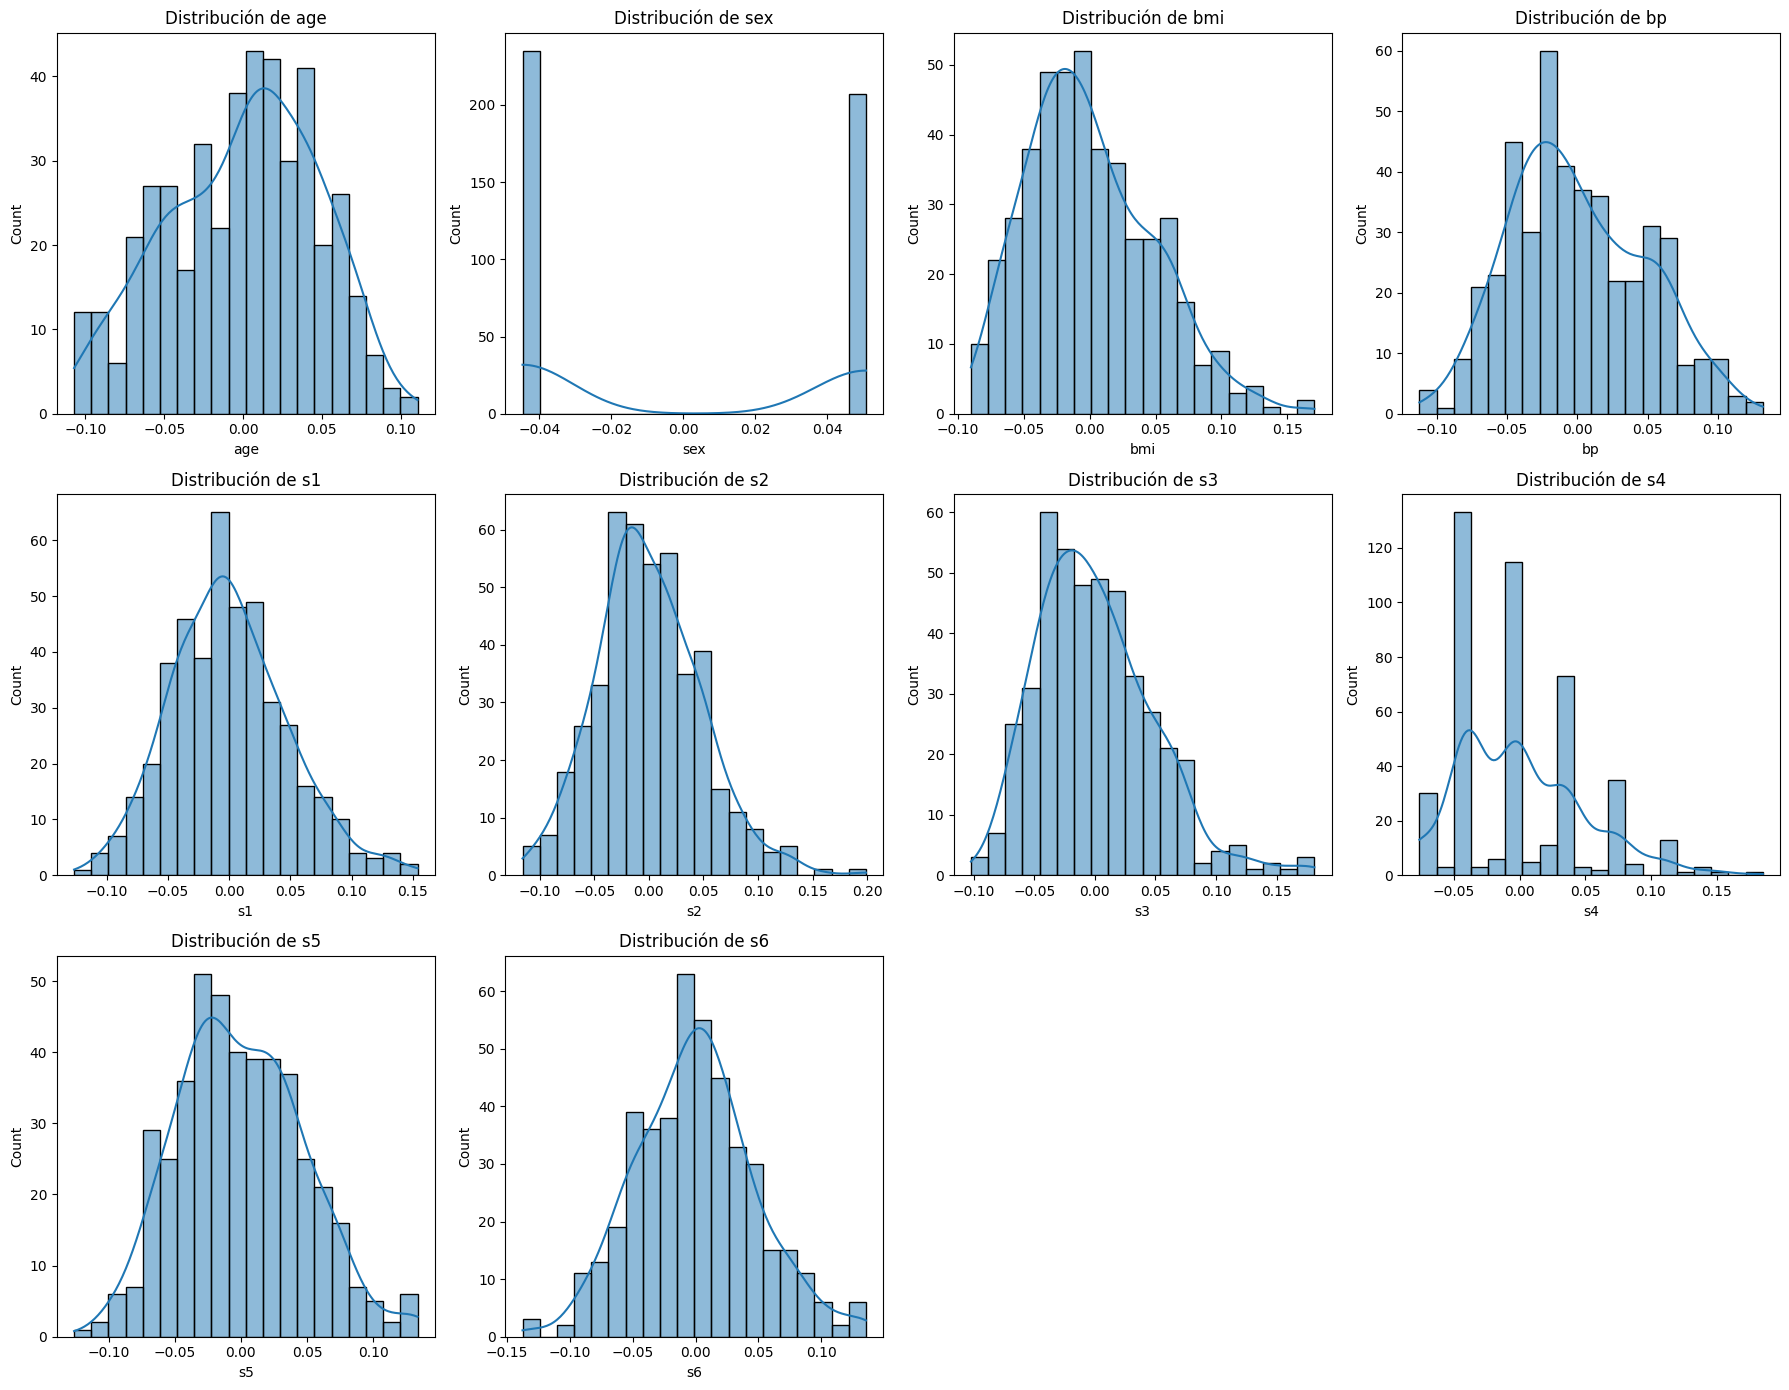

In [13]:
plt.figure(figsize=(18, 14))

# Crear una lista con los nombres de las características
features = X 

# Graficar cada una de las características en un subplot
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Organiza los gráficos en una cuadrícula 3x4
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribución de {feature}')

# Ajustar el layout
plt.tight_layout()
plt.show()

Muestra la matriz de correlaciones

In [14]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

#### DIVIDIR LOS DATOS

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### PREPARAR LOS DATOS

Analizamos los datos, comprobamos que todos los datos son numericos y que estan estandarizados.
Por lo que vamos a dar por preparados los datos.

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea y entrena el modelo con diferentes algoritmos y muestra los resultados obtenidos con validación cruzada y utilizando la métrica RMSE para medir el error

In [16]:
#Crear el modelo de Regresion Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_test, y_test)
predictions = cross_val_predict(lin_reg, X_test, y_test, cv=5)
rmse_linear_reg = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE para Regresión Lineal: {rmse_linear_reg:.4f}")

RMSE para Regresión Lineal: 57.3983


In [17]:
# Crear el modelo Ridge
ridge_reg = Ridge(alpha=1.0)  # Puedes ajustar el parámetro alpha

# Realizar validación cruzada y calcular el RMSE
predictions = cross_val_predict(ridge_reg, X, y, cv=5)
rmse_ridge_reg = np.sqrt(mean_squared_error(y, predictions))

print(f"RMSE para Ridge: {rmse_ridge_reg:.4f}")

RMSE para Ridge: 58.4838


In [18]:
# Crear el modelo Lasso
lasso_reg = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha

# Realizar validación cruzada y calcular el RMSE
predictions = cross_val_predict(lasso_reg, X, y, cv=5)
rmse_lasso_reg = np.sqrt(mean_squared_error(y, predictions))

print(f"RMSE para Lasso: {rmse_lasso_reg:.4f}")

RMSE para Lasso: 54.8529


In [ ]:
models = {
    'Regresión Lineal': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}
# Bucle para entrenar, evaluar y calcular la matriz de confusión para cada modelo
for name, model in models.items():
    print(f"Evaluando {name}:")
    
    predictions = cross_val_predict(model, X_train, y_train, cv=5)
    rmse=np.sqrt(mean_squared_error(y_train, predictions))
    print(f"RMSE:{rmse:.4f}")
    print("\n")

Evaluando Regresión Lineal:
RMSE:57.3983


Evaluando Ridge:
RMSE:65.4244


Evaluando Lasso:
RMSE:56.4232




Calcula el máximo de y (del dataset original) y el mínimo de y (del dataset original) para ver con prespectiva si RMSE es aceptable o no.

In [20]:
y_max = np.max(y)
y_min = np.min(y)

print(f"Valor máximo de y: {y_max}")
print(f"Valor mínimo de y: {y_min}")

Valor máximo de y: 346.0
Valor mínimo de y: 25.0


In [21]:
# Calcular el rango de y
y_range = y_max - y_min

# Mostrar el rango de y y los RMSE
print("\nComparación de RMSE con el rango de y:")
print(f"Rango de los valores de y: {y_range}")
print(f"RMSE para Regresión Lineal: {rmse_linear_reg:.4f}")
print(f"RMSE para Ridge: {rmse_ridge_reg:.4f}")
print(f"RMSE para Lasso: {rmse_lasso_reg:.4f}")


Comparación de RMSE con el rango de y:
Rango de los valores de y: 321.0
RMSE para Regresión Lineal: 57.3983
RMSE para Ridge: 58.4838
RMSE para Lasso: 54.8529


### OPTIMIZACIÓN DEL MODELO

Vamos a suponer que el mejor modelo que has obtenido es con Ridge y vamoas a aplicar búsqueda exhaustiva para el parámetro alpha.

In [ ]:
# Definir el modelo Ridge
ridge_reg = Ridge()

# Definir el rango de valores de alpha para probar
param_grid = {
    'alpha': np.logspace(-6, 6, 13)  # Rango de valores logarítmicos de alpha
}

# Realizar la búsqueda exhaustiva con validación cruzada
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y el mejor valor de alpha
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Mostrar el mejor valor de alpha encontrado
print(f"El mejor valor de alpha encontrado: {best_alpha}")

# Realizar predicciones con el modelo optimizado
predictions = grid_search.predict(X)

# Calcular el RMSE
rmse_best_ridge = np.sqrt(mean_squared_error(y, predictions))

# Mostrar el RMSE del mejor modelo
print(f"RMSE con el mejor modelo Ridge (alpha={best_alpha}): {rmse_best_ridge:.4f}")

El mejor valor de alpha encontrado: 0.0001
RMSE con el mejor modelo Ridge (alpha=0.0001): 53.4762


Evalúa este mejor modelo en el conjunto de pruebas

In [23]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_ridge_model.predict(X_test)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"RMSE en el conjunto de prueba con el mejor modelo Ridge (alpha={best_alpha}): {rmse_test:.4f}")

RMSE en el conjunto de prueba con el mejor modelo Ridge (alpha=0.0001): 52.6020


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [24]:
# Guardar el mejor modelo (el mejor estimador) del GridSearchCV
joblib.dump(grid_search.best_estimator_, 'mejor_modelo_ridge.pkl')
print("El mejor modelo ha sido guardado como 'mejor_modelo_ridge.pkl'.")

El mejor modelo ha sido guardado como 'mejor_modelo_ridge.pkl'.


Opcional: hacer un script de Python que pida los datos y te prediga el resultado

## EJERCICIO 4

Usa regresión logística para crear un modelo que deduzca el tipo de flor iris

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [25]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

#### EXPLORAR LOS DATOS

Visualiza los datos

In [26]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [28]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


Representa la matriz de correlaciones

In [29]:
y.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [30]:
df = X.copy()
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['target'].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

#### DIVIDIR LOS DATOS

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

Solo hay que estandarizar las columnas y por lo tanto se puede hacer directamente en la pipeline que define el modelo en el siguiente punto

### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Crear y entrenar el modelo con regresión logística y validacion cruzada ¿cuál es la exactitud en el conjunto de entrenamiento?

In [33]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
log_reg.fit(X_train, y_train)
cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")

array([0.95833333, 1.        , 0.875     , 1.        , 0.95833333])

Calcula matriz de confusion, precision, recall y f1 en el conjunto de entrenamiento

In [34]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
precision=precision_score(y_train, y_train_pred,average='weighted')
sensibilidad=recall_score(y_train, y_train_pred,average='weighted')
f1=f1_score(y_train, y_train_pred,average='weighted')

print(f"Precision: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"F1: {f1}")
print(f"Matriz de confusion: {cm}")

Precision: 0.9585416666666666
Sensibilidad: 0.9583333333333334
F1: 0.9583398447674116
Matriz de confusion: [[40  0  0]
 [ 0 38  3]
 [ 0  2 37]]


¿Qué podemos deducir?

Podemos deducir que el modelo es bastante bueno que ya la mayoria de las metricas estan por encima del 0.90.
En la matriz de confusion podemos ver que el modelo identifica bien la primera clase de iris pero tiene 2 fallos en la segunda (que los identifica como la tercera) y tiene 3 fallos en la tercera (que los identifica como la segunda).
En general, creo que este modelo se ajusta bien a nuestro datos.

### OPTIMIZACIÓN DEL MODELO

Aplica búsqueda exhaustiva con los hiperparámetros de LogisticRegression (C y solver) y guarda el mejor modelo en una variable.

In [35]:
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']  # Tolerancia para la convergencia
}

log_reg=make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))


# Configurar la búsqueda exhaustiva (GridSearchCV)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print("Mejor precisión:", grid_search.best_score_)

mejor_modelo=grid_search.best_estimator_

Mejores parámetros encontrados: {'logisticregression__C': 1, 'logisticregression__solver': 'lbfgs'}
Mejor precisión: 0.9583333333333334


### EVALUACIÓN DEL MODELO

Evalua este mejor modelo en el conjunto de pruebas (exactitud, matriz de confusión, precision, recall y f1)

In [36]:
y_test_pred=mejor_modelo.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
precision=precision_score(y_test, y_test_pred,average='weighted')
sensibilidad=recall_score(y_test, y_test_pred,average='weighted')
f1=f1_score(y_test, y_test_pred,average='weighted')

print(f"Precision: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"F1: {f1}")
print(f"Matriz de confusion: {cm}")

Precision: 1.0
Sensibilidad: 1.0
F1: 1.0
Matriz de confusion: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [37]:
joblib.dump(grid_search.best_estimator_, 'mejor_modelo_iris.pkl')
print("El mejor modelo ha sido guardado como 'mejor_modelo_iris.pkl'.")

El mejor modelo ha sido guardado como 'mejor_modelo_iris.pkl'.


## EJERCICIO 5

Intenta predecir las emisiones de CO2 con el menor error posible (sigue todos los pasos incluido crear un script para que haga predicciones).

Prueba diferentes modelos para intentar construir el mejor modelo posible (explica todos los pasos que das hasta llegar a la solución, quiero ver también los modelos que pruebas y luego los rechazas)

Dataset: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset

### Cargar datos

Descargar el CSV

import kagglehub (pip install kagglehub)


path = kagglehub.dataset_download("midhundasl/co2-emission-of-cars-dataset")

print("Path to dataset files:", path)

df=pd.read_csv(path)

In [4]:
df_co2=pd.read_csv("DATA.csv")
df_co2.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


### Explorar datos

In [5]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


### Limpiamos datos (Dejamos Car y model)

In [40]:
df_co2_dropped = df_co2.drop("Unnamed: 5", axis=1)
df_co2_dropped

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


Separamos datos

In [41]:
X=df_co2_dropped.drop("CO2",axis=1)
y=df_co2_dropped["CO2"]

Dividimos datos

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Procesamos datos

In [43]:
categorical_features = ['Car', 'Model']  
numerical_features = ['Volume', 'Weight']  

preprocessing = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

Entrenar modelos

In [44]:
models = {
    'Regresión Lineal': LinearRegression(),
    'Ridge': Ridge(alpha=10.0),
    'Lasso': Lasso(alpha=0.5),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),  
    'Árbol de Decisión': DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Evaluar modelos
for name, model in models.items():
    print(f"Evaluando {name}:")
    
    full_pipeline=make_pipeline(preprocessing,model)
    # Entrenamiento con cross_val_predict
    predictions = cross_val_predict(full_pipeline, X, y, cv=5)
    
    # Cálculo de métricas
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print("-" * 50)

Evaluando Regresión Lineal:
RMSE: 8.5556
MAE: 7.1282
--------------------------------------------------
Evaluando Ridge:
RMSE: 7.4012
MAE: 6.1615
--------------------------------------------------
Evaluando Lasso:
RMSE: 7.4468
MAE: 6.2489
--------------------------------------------------
Evaluando ElasticNet:
RMSE: 7.3658
MAE: 5.9942
--------------------------------------------------
Evaluando Árbol de Decisión:
RMSE: 9.8190
MAE: 8.2914
--------------------------------------------------


### Limpiamos datos (Sin Car y model)

Creo que el modelo sin Car y Model va a ser mejor ya que no aporta informacion al modelo.

In [6]:
df_co2_dropped1 = df_co2.drop(["Car", "Model","Unnamed: 5"], axis=1)
df_co2_dropped1

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105
5,1000,929,105
6,1400,1109,90
7,1500,1365,92
8,1500,1112,98
9,1600,1150,99


In [7]:
corr_matrix = df_co2_dropped1.corr(numeric_only=True)
corr_matrix['CO2'].sort_values(ascending=False)

CO2       1.000000
Volume    0.592082
Weight    0.552150
Name: CO2, dtype: float64

Separar datos

In [8]:
X1=df_co2_dropped1.drop("CO2",axis=1)
y1=df_co2_dropped1["CO2"]

In [9]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size=0.2, random_state=42)

Dividir datos

Entrenar modelos

In [10]:
models = {
    'Regresión Lineal': LinearRegression(),
    'Ridge': Ridge(alpha=10.0),
    'Lasso': Lasso(alpha=0.5),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),  # Ajusta estos hiperparámetros si es necesario
    'Árbol de Decisión': DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Evaluar modelos
for name, model in models.items():
    print(f"Evaluando {name}:")

    full_pipeline=make_pipeline(StandardScaler(),model)
    # Entrenamiento con cross_val_predict
    predictions = cross_val_predict(full_pipeline, X_train1, y_train1, cv=5)
    
    # Cálculo de métricas
    rmse = np.sqrt(mean_squared_error(y_train1, predictions))
    mae = mean_absolute_error(y_train1, predictions)
    
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print("-" * 50)


Evaluando Regresión Lineal:
RMSE: 6.0446
MAE: 5.0324
--------------------------------------------------
Evaluando Ridge:
RMSE: 5.8877
MAE: 4.9918
--------------------------------------------------
Evaluando Lasso:
RMSE: 6.0457
MAE: 5.0761
--------------------------------------------------
Evaluando ElasticNet:
RMSE: 5.9468
MAE: 5.0274
--------------------------------------------------
Evaluando Árbol de Decisión:
RMSE: 7.0072
MAE: 5.8594
--------------------------------------------------


Nos vamos a quedar con el modelo Ridge ya que es el que menos RMSE Y MAE tiene.

### Optimizacion del modelo

Comprobamos que el modelo es mejor si las variables Car y Model.

In [14]:
# Definir el rango de parámetros para alpha
param_dist = {
    'ridge__alpha': np.logspace(-2, 1, 6)  # Nota cómo agregamos 'ridge__' para referirse al parámetro 'alpha' en el Ridge dentro del Pipeline
}

# Crear el Pipeline con StandardScaler y Ridge
full_pipeline = make_pipeline(StandardScaler(), Ridge(max_iter=5000, tol=1e-5, random_state=42))

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(full_pipeline, 
                                   param_dist, 
                                   cv=5, 
                                   scoring='neg_mean_squared_error', 
                                   n_iter=6, 
                                   n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
random_search.fit(X_train1, y_train1)

# Mostrar los mejores parámetros y el mejor rendimiento (RMSE)
print("Mejores parámetros:", random_search.best_params_)
print("Mejor RMSE:", np.sqrt(-random_search.best_score_))

Mejores parámetros: {'ridge__alpha': np.float64(10.0)}
Mejor RMSE: 5.992144021317276


### Guardar modelo

In [17]:
joblib.dump(random_search.best_estimator_, 'mejor_modelo_co2.pkl')
print("El mejor modelo ha sido guardado como 'mejor_modelo_co2.pkl'.")

El mejor modelo ha sido guardado como 'mejor_modelo_co2.pkl'.
